**LAB 4.1**

# **A. Phát hiện trang web lừa đảo bằng kỹ thuật học máy**
***(Phishing Website Detection by Machine Learning Techniques)***

# **1. Mục tiêu:**
Website lừa đảo (phishing website) là một tấn công phi kỹ thuật (social engineering) bằng cách bắt trước các URL tin cậy. Mục tiêu bài thực hành sẽ đào tạo mô hình học máy và học sâu trên tập dữ liệu để dự đoán website lừa đảo. Cả 2 URL lừa đảo và lành tính (benign) được trích xuất thuộc tình từ thành phần cơ bản của website thành tập dữ liệu.
Dataset sử dụng trong Lab: https://drive.google.com/drive/folders/1QRMe4rVPRhsplAPssH1pa7Msf7sOMNv2?usp=sharing

# **2. Tải dữ liệu**
Các tính năng được trích xuất và lưu trữ trong tập tin csv.


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
data_dir = r'D:\\Documents\\UIT\\Nam_3\\HK2\\NT522_AI-ATTT\\NT522_Machine-learning-for-Information-Security\\Labs\\Lab_4\\dataset\\'

In [2]:
#import ackages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading the data
data0 = pd.read_csv(data_dir + 'data.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


# **3. Làm quen với dữ liệu**
Dùng Dataframe để xem qua dữ liệu.

In [4]:
#Check shape
data0.shape

(10000, 18)

In [5]:
#List features
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
#Information
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

# **4. Trực quan hóa dữ liệu**
Một số biểu đồ hiển thị để tìm các phân phối dữ liệu và cách mỗi liên quan với nhau giữa các đối tượng.

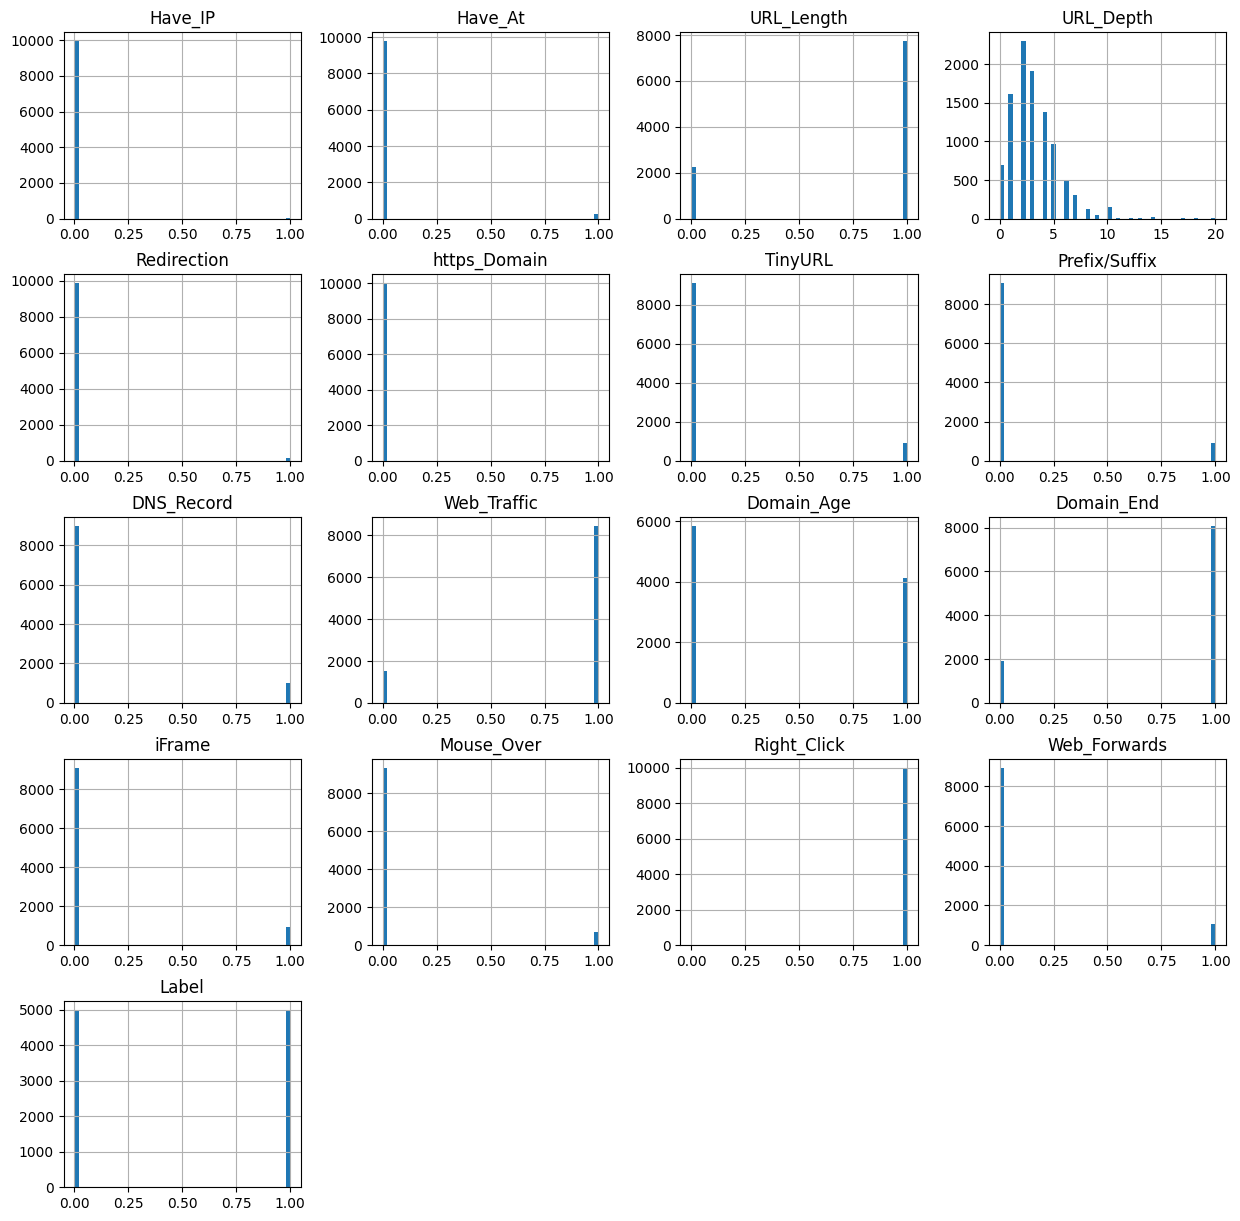

In [7]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

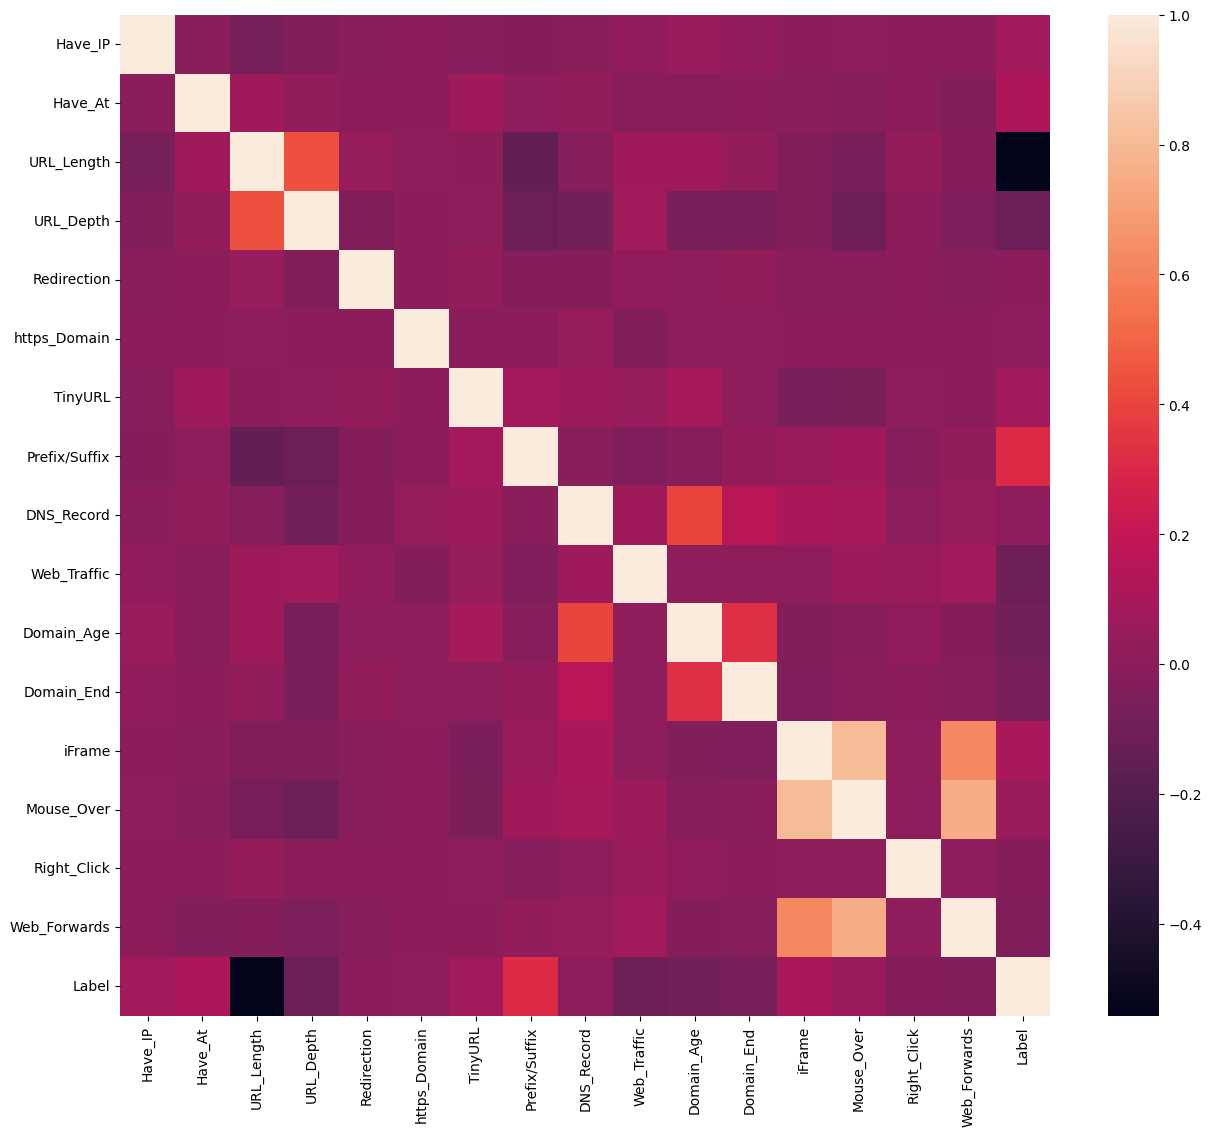

In [8]:
#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr(numeric_only=True))
plt.show()

# **5. Tiền xử lý dữ liệu & EDA**
Làm sạch dữ liệu bằng cách áp dụng các kỹ thuật tiền xử lý dữ liệu và chuyển đổi dữ liệu để sử dụng nó trong các mô hình.

In [9]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1 ngời trừ cột  'Domain' & 'URL_Depth'. cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó.

In [10]:
#Drop Domain column
data = data0.drop(['Domain'], axis = 1).copy()

Ta còn lại 16 thuộc tính và 1 cột phân loại. Giá trị tối đa của 'URL_Depth'  là 20. Ta cần chuẩn hoá cột này.

In [11]:
#check data null
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

Trong tập tin thuộc tính được trích xuất, các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

In [12]:
# shuffling the rows
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1
4,0,0,1,3,0,0,0,0,0,1,1,1,0,0,1,0,0


# **6. Chia dữ liệu**

In [13]:
#features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [14]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# **7. Đào tạo mô hình học máy/học sâu**
Ta sẽ có 2 nhãn  phishing (1) và legitimate (0), với các mô hình sau:
*  Decision Tree
*  Random Forest
*  Multilayer Perceptrons
* XGBoost
* Long Short-Term Memory (LSTM) network
* Support Vector Machines

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# Creating model results
Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## **7.1 Decision Tree Classifier**

In [17]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [18]:
#predicting
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

***Đánh giá hiệu suất***

In [19]:
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.813
Decision Tree: Accuracy on test Data: 0.815


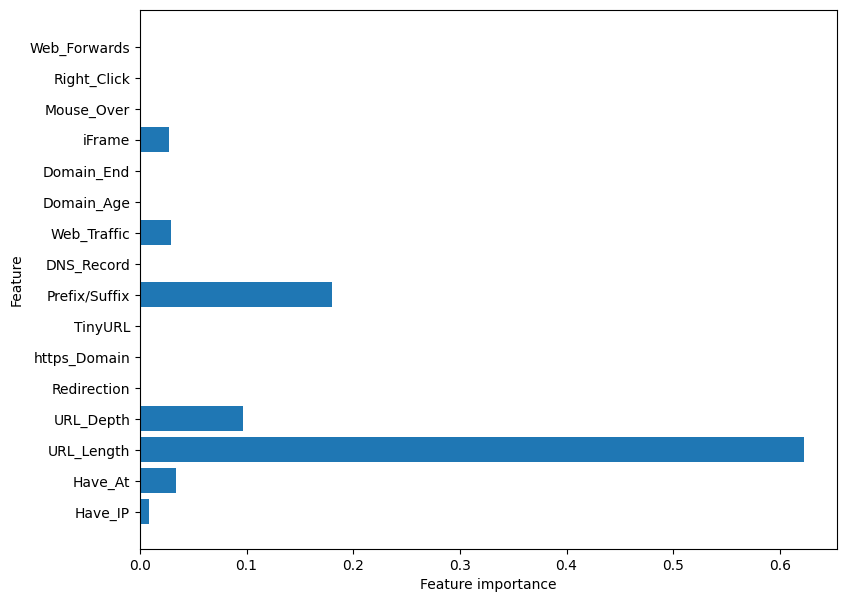

In [20]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [21]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## **7.2 Random Forest Classifier**

In [22]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate
forest = RandomForestClassifier(max_depth=5)

# fit
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [23]:
#predicting
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Đánh giá hiệu suất**

In [24]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.813
Random forest: Accuracy on test Data: 0.817


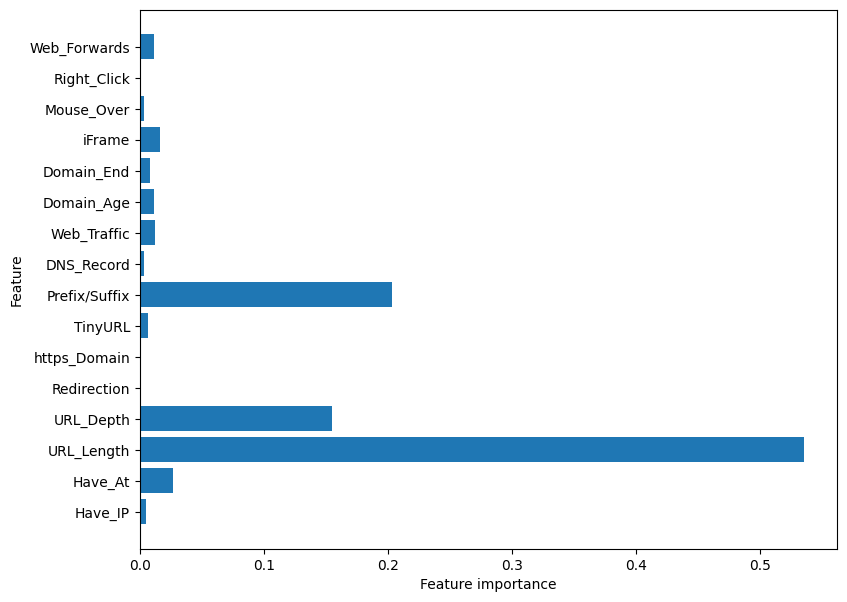

In [25]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [26]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## **7.3. Multilayer Perceptrons (MLPs) - Học sâu**

In [27]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [28]:
#predicting
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Đánh giá hiệu suất**

In [30]:
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.860
Multilayer Perceptrons: Accuracy on test Data: 0.856


**Lưu trữ kết quả**

In [31]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## **7.4. XGBoost Classifier**

In [32]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.4, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [33]:
#predicting
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Đánh giá hiệu suất**

In [34]:
#computing the accuracy
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.869
XGBoost : Accuracy on test Data: 0.860


**Lưu trữ kết quả**

In [35]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **7.5. Long Short-Term Memory (LSTM) network**
***Bài tập số 1: Hoàn thành huấn luyến mô hình LSTM.***

In [36]:
# 1) Chuẩn bị dữ liệu cho LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [37]:
# 2) reshape thành (samples, timesteps, features_per_step)
X_tr_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_te_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


In [38]:

# 3) Xây dựng model
model_lstm = Sequential([
    LSTM(64, input_shape=(X_tr_lstm.shape[1], X_tr_lstm.shape[2])),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


C:\Users\WanThinnn\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:

# 4) Huấn luyện
history = model_lstm.fit(
    X_tr_lstm, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_te_lstm, y_test),
    verbose=2
)


Epoch 1/20
250/250 - 2s - 9ms/step - accuracy: 0.6164 - loss: 0.6185 - val_accuracy: 0.6925 - val_loss: 0.5366
Epoch 2/20
250/250 - 1s - 4ms/step - accuracy: 0.6766 - loss: 0.5553 - val_accuracy: 0.6925 - val_loss: 0.5216
Epoch 3/20
250/250 - 1s - 4ms/step - accuracy: 0.7237 - loss: 0.5145 - val_accuracy: 0.7520 - val_loss: 0.4852
Epoch 4/20
250/250 - 1s - 4ms/step - accuracy: 0.6137 - loss: 0.6475 - val_accuracy: 0.6980 - val_loss: 0.5763
Epoch 5/20
250/250 - 1s - 4ms/step - accuracy: 0.6787 - loss: 0.5716 - val_accuracy: 0.6730 - val_loss: 0.5345
Epoch 6/20
250/250 - 1s - 4ms/step - accuracy: 0.7038 - loss: 0.5612 - val_accuracy: 0.7000 - val_loss: 0.6178
Epoch 7/20
250/250 - 1s - 4ms/step - accuracy: 0.6715 - loss: 0.5943 - val_accuracy: 0.6700 - val_loss: 0.5874
Epoch 8/20
250/250 - 1s - 4ms/step - accuracy: 0.7006 - loss: 0.5438 - val_accuracy: 0.7250 - val_loss: 0.5168
Epoch 9/20
250/250 - 1s - 4ms/step - accuracy: 0.6884 - loss: 0.5664 - val_accuracy: 0.7265 - val_loss: 0.5815
E

In [40]:

# 5) Đánh giá và lưu kết quả
train_loss, train_acc_lstm = model_lstm.evaluate(X_tr_lstm, y_train, verbose=0)
test_loss,  test_acc_lstm  = model_lstm.evaluate(X_te_lstm, y_test,  verbose=0)

print(f"LSTM: Accuracy trên training = {train_acc_lstm:.3f}")
print(f"LSTM: Accuracy trên test     = {test_acc_lstm:.3f}")

storeResults('LSTM', train_acc_lstm, test_acc_lstm)


LSTM: Accuracy trên training = 0.771
LSTM: Accuracy trên test     = 0.780


## **7.6. Support Vector Machines**
***Bài tập số 2: Hoàn thành huấn luyến mô hình SVM.***

In [41]:
# 1) Import thư viện cần thiết cho SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [42]:
# 2) Khởi tạo mô hình SVM
svm = SVC(kernel='linear', C=1.0, random_state=12)


In [43]:

# 3) Huấn luyện mô hình
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=12)

In [44]:
# 4) Dự đoán
y_train_svm = svm.predict(X_train)
y_test_svm = svm.predict(X_test)

In [45]:
# 5) Tính toán độ chính xác
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Accuracy: ", round((tp + tn) / (tp + tn + fp + fn), 8))
print('False positive rate(FPR): ', round(fp / (fp + tn), 8))
print('False negative rate(FN): ', round(fn / (fn + tp), 8))
recall = round(tp / (tp + fn), 8)
print('Recall(TPR): ', recall)
precision = round(tp / (tp + fp), 8)
print('Precision: ', precision)
print('F1 score: ', round((2 * precision * recall) / (precision + recall), 8))

Accuracy:  0.806
False positive rate(FPR):  0.0182002
False negative rate(FN):  0.36597428
Recall(TPR):  0.63402572
Precision:  0.97268589
F1 score:  0.76766467


In [46]:
# 6) Tính toán độ chính xác 
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.801
SVM : Accuracy on test Data: 0.806


In [47]:
# 7) Lưu kết quả
storeResults('Support Vector Machines', acc_train_svm, acc_test_svm) 

# **8. So sánh các mô hình**

In [48]:

results = pd.DataFrame({ 
    'Model': Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test
})

# Loại bỏ các dòng trùng nhau
results = results.drop_duplicates()
print(results)


                     Model  Train Accuracy  Test Accuracy
0            Decision Tree           0.813          0.815
1            Random Forest           0.813          0.817
2   Multilayer Perceptrons           0.860          0.856
3                  XGBoost           0.869          0.860
4                     LSTM           0.771          0.780
5  Support Vector Machines           0.801          0.806


In [49]:
#Sort accuracy

results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,Model,Train Accuracy,Test Accuracy
3,XGBoost,0.869,0.860
2,Multilayer Perceptrons,0.860,0.856
1,Random Forest,0.813,0.817
0,Decision Tree,0.813,0.815
5,Support Vector Machines,0.801,0.806
4,LSTM,0.771,0.780


***Bài tập số 3: Cho biết kết quả so sánh mô hình, sau đó viết code lưu trữ mô hình.***

In [51]:
import pandas as pd
import joblib

# Lưu Decision Tree
joblib.dump(tree, 'model/decision_tree_model.pkl')
print("✅ Decision Tree model saved successfully.")

# Lưu Random Forest
joblib.dump(forest, 'model/random_forest_model.pkl')
print("✅ Random Forest model saved successfully.")

# Lưu Multilayer Perceptrons (MLP)
joblib.dump(mlp, 'model/mlp_model.pkl')
print("✅ MLP model saved successfully.")

# Lưu XGBoost
joblib.dump(xgb, 'model/xgboost_model.pkl')
print("✅ XGBoost model saved successfully.")

# Lưu LSTM
joblib.dump(model_lstm, 'model/lstm_model.pkl')
print("✅ LSTM model saved successfully.")

# Lưu SVM
joblib.dump(svm, 'model/svm_model.pkl')
print("✅ SVM model saved successfully.")


✅ Decision Tree model saved successfully.
✅ Random Forest model saved successfully.
✅ MLP model saved successfully.
✅ XGBoost model saved successfully.
✅ LSTM model saved successfully.
✅ SVM model saved successfully.


# **9. Trích dẫn**
https://blog.keras.io/building-autoencoders-in-keras.html
https://en.wikipedia.org/wiki/Autoencoder
https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/

**LAB 4.2**

# *B. Trích xuất thuộc tính trang web lừa đảo*
***(Phishing Website Detection Feature Extraction)***

# **1. Thu thập dữ liệu**
Ta cần 2 nhãn hớp pháp - legitimate (0) và lừa đảo - phishing (1).
Việc thu thập các url lừa đảo khá dễ dàng do nguồn mở có tên PhishTank. Dịch vụ này cung cấp một tập hợp các URL lừa đảo ở nhiều định dạng như csv, json, v.v. được cập nhật hàng giờ. Để tải xuống dữ liệu: https://www.phishtank.com/developer_info.php
Đối với các url hợp pháp, nguồn từ trường ĐH New Brunswick có sẵn các dạng benign, spam, phishing, malware & defacement URL  https://www.unb.ca/cic/datasets/url-2016.html. Số lượng URL hợp pháp là 35,300 'Benign_list.csv'

## **1.1. Phishing URLs:**

In [ ]:
import pandas as pd

In [ ]:
#Download phishing URLs
!wget http://data.phishtank.com/data/online-valid.csv

In [ ]:
#Load CSV
data0 = pd.read_csv("online-valid.csv")
data0.head()

In [ ]:
data0.shape



Chọn ngẫu nhiên 10000 mẫu.

In [ ]:
phishurl = data0.sample(n = 10000, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

In [ ]:
phishurl.shape

## **1.2. Legitimate URLs:**

In [ ]:
#Load legitimate files
data1 = pd.read_csv(dâta_dir + "List_Benign_URL.csv")
data1.columns = ['URLs']
data1.head()

In [ ]:
#Collec 5,000 Legitimate URLs randomly
legiurl = data1.sample(n = 10000, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

In [ ]:
legiurl.shape

# **2. Trích xuất thuộc tính**
Các thuộc tính sẽ được trích xuất phân loại thành:
* Address Bar
* Domain
* HTML & Javascript

## **2.1 Thuộc tính Address Bar**
Ta chỉ chọn một số thuộc tính cơ bản sau:
* Domain of URL
* IP Address in URL
* "@" Symbol in URL
* Length of URL
* Depth of URL
* Redirection "//" in URL
* "http/https" in Domain name
* Using URL Shortening Services “TinyURL”
* Prefix or Suffix "-" in Domain

In [ ]:
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [ ]:
# 1.Domain
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

In [ ]:
# 2.Have_IP
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [ ]:
# 3.Have_At (@)
def haveAtSign(url):
  if "@" in url:
    at = 1
  else:
    at = 0
  return at

In [ ]:
# 4.URL_Length
def getLength(url):
  if len(url) < 54:
    length = 0
  else:
    length = 1
  return length

In [ ]:
# 5.URL_Depth '/'
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [ ]:
# 6.Redirection '//'
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [ ]:
# 7. https_Domain
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [ ]:
# 8. Checking Tiny_URL
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [ ]:
# 9.Check Prefix or Suffix "-" in Domain
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

## **2.2 Thuộc tính Domain**
Các thể loại thuộc tính được trích xuất:
* DNS Record
* Website Traffic
* Age of Domain
* End Period of Domain

In [ ]:
!pip install python-whois

In [ ]:
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [ ]:
# 11.DNS_Record
# obtained in the featureExtraction function

In [ ]:
#Nếu thứ hạng của doamin <100000, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp).
# 12.Web traffic
def web_traffic(url):
  try:
    #Fill whitespaces  URL if any
    url = urllib.parse.quote(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0

In [ ]:
#Nếu age of domain > 12 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 13.Survival time of domain (Domain_Age)
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

In [ ]:
# Nếu period of domain > 6 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 14.End time of domain (Domain_End)
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

## **2.3 Thuộc tính HTML and JavaScript**
Các tập thuộc tính được trích xuất sau:
* IFrame Redirection
* Status Bar Customization
* Disabling Right Click
* Website Forwarding

In [ ]:
import requests

In [ ]:
# 15. IFrame
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [ ]:
# 16.Check Mouse_Over
def mouseOver(response):
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [ ]:
# 17.Check Right_Click
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [ ]:
# 18.Check Web_Forwards
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

# **3. Tính toán thuộc tính URLs**
Tạo danh sách và một hàm gọi các hàm khác và lưu trữ tất cả các thuộc tính của URL vào list.

In [ ]:
def featureExtraction(url,label):

  features = []
  #Address bar features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))

  #Domain features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))

  # HTML & Javascript features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)

  return features

## **3.1 URL hợp pháp**

In [ ]:
legiurl.shape

In [ ]:
legi_features = []
label = 0

for i in range(0, 10000):
  url = legiurl['URLs'][i]
  legi_features.append(featureExtraction(url,label))

In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

In [ ]:
legitimate.to_csv('legitimate.csv', index= False)

## **3.2 URL lừa đảo**

In [ ]:
phishurl.shape

In [ ]:
phish_features = []
label = 1
for i in range(0, 10000):
  url = phishurl['url'][i]
  phish_features.append(featureExtraction(url,label))

In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

In [ ]:
phishing.to_csv('phishing.csv', index= False)

# **4. Datasets**

In [ ]:
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head()

In [ ]:
urldata.tail()

In [ ]:
urldata.shape

In [ ]:
urldata.to_csv('preprocessed_data.csv', index=False)

Ta trích xuất được 18 thuộc tính với 20,000 rows trong đó có  10000 phishing  & 10000 legitimate URL

***Bài tập số 3: Dựa vào mục trích xuất dữ liệu Lab 4.2, chọn một tập dataset khác thực hiện lại Lab 4.1***

# **5. Trích dẫn**

https://archive.ics.uci.edu/ml/datasets/Phishing+Websites